In [54]:
# load modules
%load_ext autoreload
%autoreload 2
from scripts.BZ2Reader import bz2reader
import seaborn as sns
import os
import glob
from pprint import pprint

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# the bz2reader creates various generators for a bz2 file
bz2 = bz2reader(os.path.join('data','RC_2011-08.bz2'), max_lines=100)

In [3]:
# the simplest generator just yields a dictionary with all attributes for each post
post_gen = bz2.read_lines()
next(post_gen)

{'link_id': 't3_j4zx3',
 'score_hidden': False,
 'score': 1,
 'archived': True,
 'author_flair_text': None,
 'subreddit': 'fffffffuuuuuuuuuuuu',
 'body': '"$2, would you take that deal? I\'d take that deal"',
 'author': 'DorkyDude',
 'distinguished': None,
 'parent_id': 't3_j4zx3',
 'id': 'c298mtc',
 'subreddit_id': 't5_2qqlo',
 'controversiality': 0,
 'gilded': 0,
 'downs': 0,
 'retrieved_on': 1427415708,
 'name': 't1_c298mtc',
 'ups': 1,
 'edited': False,
 'author_flair_css_class': None,
 'created_utc': '1312156800'}

In [12]:
# the select_keys generator return only the specified attributes
keys = ['subreddit', 'body']
spec_post_gen = bz2.select_keys(keys = keys)
next(spec_post_gen)


{'subreddit': 'motorcycles', 'body': 'Have you wrecked in them yet?'}

In [13]:
# is is also all possible to generate a dictionary with subreddit
# as keys and list of all posts in that subreddit as values
# be carefule with max_lines (selecting -1 for all posts will use 
# a lot of memory) 
keys = ['subreddit', 'body']
bz2 = bz2reader(os.path.join('data','RC_2011-08.bz2'), keys=keys, max_lines=100)

post_dict= bz2.build_structure()


In [14]:
print('Number of subbreddits = ', len(post_dict), end='\n\n')

min_posts = 5
print(f'Printing subreddits with at least {min_posts} posts', end ='\n\n')

for k, v in post_dict.items():
    if len(v) > min_posts:
        print(k,' : ', len(v))

Number of subbreddits =  48

Printing subreddits with at least 5 posts

fffffffuuuuuuuuuuuu  :  7
AskReddit  :  10


In [2]:
# This will generate separate files for each subreedit with more than p_min posts
# there is a tradeoff in memory v. disk writes with p_min and batch_save

keys = ['subreddit', 'body']
bz2 = bz2reader(os.path.join('data','RC_2011-08.bz2'), keys=keys, max_lines=-1)
bz2.file_writer(dest='data', p_min=1e4, batch_save=1e2)

Initializing file for AskReddit
Initializing file for pics
Initializing file for gaming
Initializing file for reddit.com
Initializing file for fffffffuuuuuuuuuuuu
Initializing file for funny
Initializing file for politics
Initializing file for starcraft
Initializing file for IAmA
Initializing file for atheism
Initializing file for trees
Initializing file for videos
Initializing file for todayilearned
Initializing file for WTF
Initializing file for worldnews
Initializing file for leagueoflegends
Initializing file for Minecraft
Initializing file for TwoXChromosomes
Initializing file for Fitness
Initializing file for tf2
Initializing file for gonewild
Initializing file for Android
Initializing file for harrypotter
Initializing file for mylittlepony
Initializing file for guns
Initializing file for technology
Initializing file for explainlikeimfive
Initializing file for soccer
Initializing file for Music
Initializing file for Libertarian
Initializing file for askscience
Initializing file fo

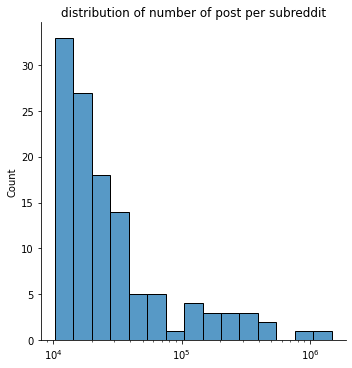

In [53]:
# check for length of each file and plot distribution
# using effiecient file length function
# https://stackoverflow.com/questions/845058/#how-to-get-line-count-of-a-large-file-cheaply-in-python

from glob import glob

srs = glob(os.path.join('data', 'subreddits', '*.txt'))

def rawcount(filename):
    f = open(filename, 'rb')
    lines = 0
    buf_size = 1024 * 1024
    read_f = f.raw.read

    buf = read_f(buf_size)
    while buf:
        lines += buf.count(b'\n')
        buf = read_f(buf_size)

    return lines

b_limit = 1e6
big_files = []
m_limit = 1e5
medium_files = []
small_files = []

text_counts = dict()
for sr in srs:
    reddit = sr.split('\\')[-1].replace('.txt', '') 
    # print(reddit, end = ' : ')
    lines = rawcount(sr)
    # print(lines, 'posts')
    text_counts[reddit] = lines
    if lines >= b_limit:
        big_files.append(sr)
    elif lines >= m_limit:
        medium_files.append(sr)
    elif sr:
        small_files.append(sr)

sns.displot(text_counts, bins=15, kind='hist', log_scale=True)
plt.title('distribution of number of post per subreddit')
plt.show();